In [1]:
import pandas as pd
import numpy as np

In [2]:
labels = pd.read_csv('train_labels.csv')
values = pd.read_csv('train_values.csv')

In [3]:
data = pd.merge(labels, values)

In [4]:
data

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,...,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,...,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,...,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,...,0,0,0,0,0,0,0,0,0,0


### Convert categorical informations into numeric values

In [5]:
for col_name in data.columns:
    if(data[col_name].dtype != 'int64'):
        data[col_name] = data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

In [6]:
data

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,2,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,1,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,2,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,2,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,0,...,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,2,...,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,2,...,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,2,...,0,0,0,0,0,0,0,0,0,0


### Find the distributions of features in labels.

In [7]:
def find_no_of_occurences_of_classes(data, levels):
    
    sozlukler = []
    for level in levels:
        sozluk = dict()
        for column in level.columns[2:]:
            Range = 1 + data[column].max() - data[column].min()
            if Range > 10:
                interval = Range // 3  
                interval_1 = level[level[column] / interval <= 1][column].size
                interval_2 = level[(level[column] / interval <= 2) & (level[column] / interval > 1)][column].size
                interval_3 = level[level[column] / interval > 2][column].size
                key1 = str(column) + " < " + str(interval)
                key2 = str(column) + " < " + str(2* interval)
                key3 = str(column) + " < " + str(3* interval)
                sozluk[key1] = interval_1
                sozluk[key2] = interval_2
                sozluk[key3] = interval_3
            else:
                interval = Range
                for i in range(interval):
                    key = str(column) + " = " + str(i)
                    interval_i = level[level[column] == i][column].size
                    sozluk[key] = interval_i
        sozlukler.append(sozluk)
    return sozlukler

In [8]:
level_1 = data[data['damage_grade'] == 1]
level_2 = data[data['damage_grade'] == 2]
level_3 = data[data['damage_grade'] == 3]

In [9]:
dicts = find_no_of_occurences_of_classes(data, [level_1, level_2, level_3])
DF = pd.DataFrame(dicts)
DF.index = [1, 2, 3]
DF.index.name = 'Level'
DF.to_csv('Class-Feature-Occurences.csv')
df2 = pd.read_csv('Class-Feature-Occurences.csv')
DF

,geo_level_1_id < 10,geo_level_1_id < 20,geo_level_1_id < 30,geo_level_2_id < 476,geo_level_2_id < 952,geo_level_2_id < 1428,geo_level_3_id < 4189,geo_level_3_id < 8378,geo_level_3_id < 12567,count_floors_pre_eq = 0,...,has_secondary_use_industry = 0,has_secondary_use_industry = 1,has_secondary_use_health_post = 0,has_secondary_use_health_post = 1,has_secondary_use_gov_office = 0,has_secondary_use_gov_office = 1,has_secondary_use_use_police = 0,has_secondary_use_use_police = 1,has_secondary_use_other = 0,has_secondary_use_other = 1
Level,,,,,,,,,,,,,,,,,,,,,
1,7612,6816,10696,10258,6937,7929,8589,7832,8703,0,...,25065,59,25112,12,25111,13,25120,4,24949,175
2,74246,36187,37826,50882,51417,45960,50735,48674,48850,0,...,148107,152,148227,32,148238,21,148247,12,147407,852
3,39075,28975,19168,28924,28130,30164,28295,29729,29194,0,...,87150,68,87213,5,87214,4,87211,7,86911,307


Here we see the features' distributions over different damage levels.
### Run KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
data = data.sample(frac=1)
n = data.shape[0]
trainsize = int(4 * n / 5)
train = data[:trainsize]
test = data[trainsize:]

In [11]:
from sklearn.metrics import f1_score

accuracies = dict()
train_X = train[train.columns[2:]]
train_Y = train[train.columns[1]]
test_X = test[test.columns[2:]]
test_Y = test[test.columns[1]]
for i in range(16):
    k = 2*i + 1
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_Y)
    pred = knn.predict(test_X)
    
    f1score = f1_score(test_Y, pred, average='weighted')
    score = knn.score(test_X, test_Y)
    accuracies[k] = (score, f1score)
    print(k, score, f1score)

1 0.66926958423668 0.6690889722544493
3 0.6948255021968113 0.6937059520409761
5 0.7076802056752557 0.704582748721207
7 0.712035455958251 0.7077277209022366
9 0.711536616718789 0.7066831923193353
11 0.7099441683774295 0.7044164203067558
13 0.7092150956428311 0.7030926852804034
15 0.7080831142917442 0.7013659923361881
17 0.7047063563630782 0.697435646427567
19 0.7023848352871204 0.6943875950118359
21 0.6999481974635944 0.691682798085192
23 0.6970510926497957 0.6881584032838329
25 0.6942691045835652 0.6845936994468426
27 0.6913719997697665 0.6812010793702993
29 0.6881679169624527 0.6774583633715239
31 0.6859806987586577 0.6747340485642446


In [12]:
accuraciesW = dict()
train_X = train[train.columns[2:]]
train_Y = train[train.columns[1]]
test_X = test[test.columns[2:]]
test_Y = test[test.columns[1]]
for i in range(16):
    k = 2*i + 1
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(train_X, train_Y)
    pred = knn.predict(test_X)
    
    f1score = f1_score(test_Y, pred, average='weighted')
    score = knn.score(test_X, test_Y)
    accuraciesW[k] = (score, f1score)
    print(k, score, f1score)

1 0.66926958423668 0.6690889722544493
3 0.6923888643732853 0.6907395093124944
5 0.7013679706836016 0.6987733115890384
7 0.7084284645344486 0.7050244990248941
9 0.7102511463709446 0.7062935183287844
11 0.7121505727058192 0.7077633972494622
13 0.7133401124306902 0.708535271815662
15 0.7142610464112354 0.7091134841292195
17 0.7138581377947468 0.7084163563397962
19 0.7136662765487999 0.7079393607501112
21 0.7130331344371751 0.7069477365305478
23 0.7132633679323114 0.7069069712211573
25 0.7126302258206865 0.7059349670060157
27 0.7120930143320351 0.7051884042639383
29 0.7109610329809481 0.7039224357061111
31 0.710404635367702 0.7031277592828323


In [13]:
import matplotlib.pyplot as plt

In [14]:
def Plot(x, y1, y2):
    acc = [i[0] for i in y1]
    f1 = [i[1] for i in y1]
    accw = [i[0] for i in y2]
    f1w = [i[1] for i in y2]
    plt.xlim((1, 31))
    plt.plot(list(accuraciesW.keys()), acc, 'o-', label='Accuracy, KNN')
    plt.plot(list(accuraciesW.keys()), f1, 'o-', label='F1 Score, KNN')
    plt.plot(list(accuraciesW.keys()), accw, 'o-', label='Accuracy, Weighted KNN')
    plt.plot(list(accuraciesW.keys()), f1w, 'o-', label='F1 Score, Weighted KNN')
    plt.legend()
    plt.grid()
    

### KNN Results

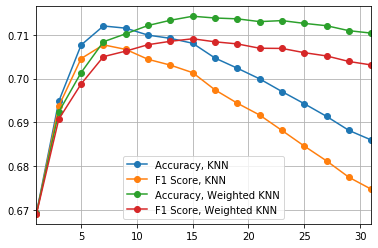

In [15]:
Plot(list(accuracies.keys()),list(accuracies.values()), list(accuraciesW.values()))

In [16]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(train_X, train_Y)

In [17]:
from sklearn.metrics import f1_score

accuracies = dict()
test_X = test[test.columns[2:]]
test_Y = test[test.columns[1]]
for i in range(16):
    k = 2*i + 1
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_res, y_res)
    pred = knn.predict(test_X)
    
    f1score = f1_score(test_Y, pred, average='weighted')
    score = knn.score(test_X, test_Y)
    accuracies[k] = (score, f1score)
    print(k, score, f1score)

1 0.6689050478693809 0.6714206480362822
3 0.6670823660328851 0.6722131208778639
5 0.6650102645766581 0.6709959553708171
7 0.661268970280693 0.6676751205275269
9 0.6563189501352622 0.6631547209524693
11 0.6534026591968688 0.6604353167518107
13 0.6491049672876575 0.6560161225622442
15 0.645018322748988 0.6522350817526351
17 0.6438095968995222 0.651227874475491
19 0.638763646131118 0.6463935307054249
21 0.6357130523205617 0.6435917244437219
23 0.6313194297883771 0.6392649256470039
25 0.6275973216170065 0.6356503188067015
27 0.6241821914391512 0.6324713278840268
29 0.6198461272807506 0.6282918013236282
31 0.6167187889718155 0.6251704436004345


In [18]:
accuraciesW = dict()
train_X = train[train.columns[2:]]
train_Y = train[train.columns[1]]
test_X = test[test.columns[2:]]
test_Y = test[test.columns[1]]
for i in range(16):
    k = 2*i + 1
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_res, y_res)
    pred = knn.predict(test_X)
    
    f1score = f1_score(test_Y, pred, average='weighted')
    score = knn.score(test_X, test_Y)
    accuraciesW[k] = (score, f1score)
    print(k, score, f1score)

1 0.6689050478693809 0.6714206480362822
3 0.6718021526831796 0.6759266681131663
5 0.6725695976669672 0.6772438706781136
7 0.6723009919226416 0.6773551092394777
9 0.6714184301912857 0.6767502067470034
11 0.6713608718175016 0.6768525301999166
13 0.669461445482627 0.6751765516232272
15 0.6686940004988392 0.6745090228790176
17 0.6674085301509948 0.6733185943790003
19 0.6652788703209839 0.6714330974368209
21 0.6642236334682757 0.6704325047934362
23 0.6641660750944917 0.6704604916456011
25 0.6624776961301587 0.6688972973318095
27 0.6613649009036665 0.6678634665287196
29 0.6601561750542008 0.6667426193254377
31 0.6583718654668943 0.6650773968959661


### Resampled Dataset, KNN results

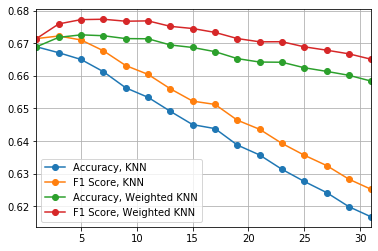

In [19]:
Plot(list(accuracies.keys()),list(accuracies.values()), list(accuraciesW.values()))
